In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-dataset/no/34 no.jpg
/kaggle/input/brain-dataset/no/N20.JPG
/kaggle/input/brain-dataset/no/N1.JPG
/kaggle/input/brain-dataset/no/49 no.jpg
/kaggle/input/brain-dataset/no/N15.jpg
/kaggle/input/brain-dataset/no/No18.jpg
/kaggle/input/brain-dataset/no/31 no.jpg
/kaggle/input/brain-dataset/no/no 6.jpg
/kaggle/input/brain-dataset/no/3 no.jpg
/kaggle/input/brain-dataset/no/no 5.jpeg
/kaggle/input/brain-dataset/no/no 1.jpg
/kaggle/input/brain-dataset/no/26 no.jpg
/kaggle/input/brain-dataset/no/N26.JPG
/kaggle/input/brain-dataset/no/N5.jpg
/kaggle/input/brain-dataset/no/6 no.jpg
/kaggle/input/brain-dataset/no/No21.jpg
/kaggle/input/brain-dataset/no/17 no.jpg
/kaggle/input/brain-dataset/no/No22.jpg
/kaggle/input/brain-dataset/no/29 no.jpg
/kaggle/input/brain-dataset/no/46 no.jpg
/kaggle/input/brain-dataset/no/32 no.jpg
/kaggle/input/brain-dataset/no/42 no.jpg
/kaggle/input/brain-dataset/no/no 90.jpg
/kaggle/input/brain-dataset/no/no 94.jpg
/kaggle/input/brain-dataset/no/No19

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from tqdm.notebook import tqdm  # Use `tqdm.notebook` for Jupyter Notebooks

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
from fastai.vision.all import *
import os
import cv2
from tqdm import tqdm

# Define paths
path = Path('/kaggle/input/brain-dataset')
no = path/'no'
yes = path/'yes'

X = []
y = []

# Load 'yes' images
for img_name in tqdm(os.listdir(yes)):
    img_path = yes/img_name
    img = cv2.imread(str(img_path))
    img = cv2.resize(img, (224,224))
    X.append(img)
    y.append('Y')

# Load 'no' images
for img_name in tqdm(os.listdir(no)):
    img_path = no/img_name
    img = cv2.imread(str(img_path))
    img = cv2.resize(img, (224,224))
    X.append(img)
    y.append('N')

# Convert lists to arrays
X = np.array(X)
y = np.array(y)


100%|██████████| 98/98 [00:00<00:00, 354.77it/s]


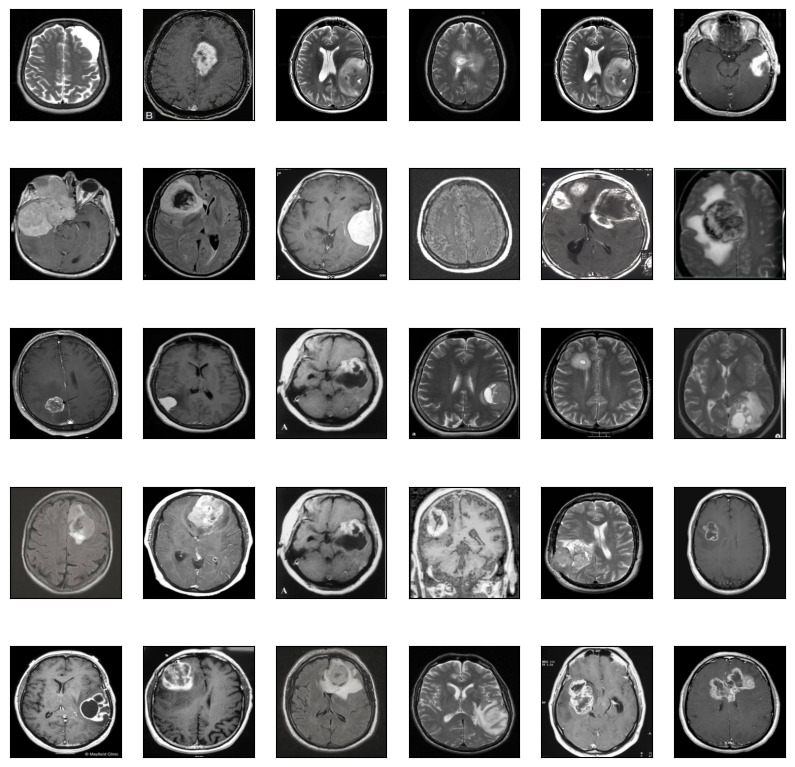

In [35]:
plt.figure(figsize=(10,10))
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X[i], cmap=plt.cm.binary)

In [36]:
print("X = ", len(X))
y = y[:253]
print("y = ", len(y))

X =  253
y =  253


In [37]:
from sklearn.model_selection import train_test_split

X = np.array(X)  # Replace with your features
y = np.array(y)  # Replace with your labels

# Assuming X and y are your features and labels respectively

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Further split the training set into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [38]:
print("Shape of an image in X_train = ", X_train[0].shape)
print("Shape of an image in X_test = ", X_test[0].shape)
print("Shape of an image in X_test = ", X_val[0].shape)

Shape of an image in X_train =  (224, 224, 3)
Shape of an image in X_test =  (224, 224, 3)
Shape of an image in X_test =  (224, 224, 3)


In [39]:
# Check the shape of images to ensure they have 3 channels before converting
if X_train.shape[-1] == 3:
    X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
if X_test.shape[-1] == 3:
    X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])
if X_val.shape[-1] == 3:
    X_val = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_val])

# Add the channel dimension back
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

print("Shape of an image in X_train:", X_train[0].shape)  # Should be (num_images, 224, 224, 1)
print("Shape of an image in X_test:", X_test[0].shape)    # Should be (num_images, 224, 224, 1)
print("Shape of an image in X_val:", X_val[0].shape)      # Should be (num_images, 224, 224, 1)


Shape of an image in X_train: (224, 224, 1)
Shape of an image in X_test: (224, 224, 1)
Shape of an image in X_val: (224, 224, 1)


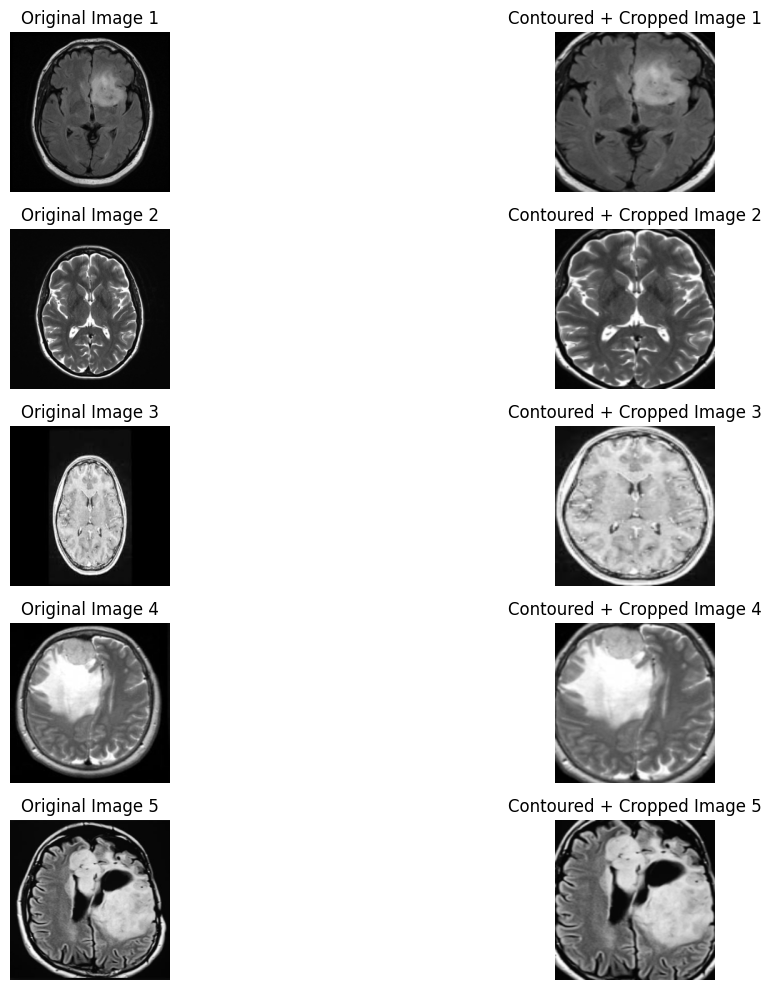

Train shape: (161, 224, 224, 1)
Validation shape: (41, 224, 224, 1)
Test shape: (51, 224, 224, 1)
Training set: X_train (161, 224, 224, 1), y_train (161, 2)
Validation set: X_val (41, 224, 224, 1), y_val (41, 2)
Test set: X_test (51, 224, 224, 1), y_test (51, 2)


In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Define the preprocessing and contouring function
def preprocess_and_contour_crop_image(image):
    # Convert to grayscale if needed
    if len(image.shape) == 3 and image.shape[2] == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image  # Already grayscale

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply thresholding (Otsu's thresholding)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply erosion to remove small white noises
    eroded = cv2.erode(binary, None, iterations=2)

    # Apply dilation to expand the object boundaries
    dilated = cv2.dilate(eroded, None, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Find the largest contour by area
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Get the bounding box coordinates
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Crop the image using the bounding box
        cropped_image = image[y:y+h, x:x+w]
        
        # Resize the cropped image to the original size (if required)
        cropped_image = cv2.resize(cropped_image, (image.shape[1], image.shape[0]))

        return cropped_image
    else:
        # Return the original image if no contours are found
        return image

# Apply preprocessing, contouring, and cropping to datasets
def apply_preprocessing_and_contouring_to_dataset(X):
    contoured_cropped_images = []
    for image in X:
        contoured_cropped_image = preprocess_and_contour_crop_image(image)
        contoured_cropped_images.append(contoured_cropped_image)
    return np.array(contoured_cropped_images)

# Apply preprocessing to training, validation, and test datasets
X_train_contoured_cropped = apply_preprocessing_and_contouring_to_dataset(X_train)
X_test_contoured_cropped = apply_preprocessing_and_contouring_to_dataset(X_test)
X_val_contoured_cropped = apply_preprocessing_and_contouring_to_dataset(X_val)

# Display the original and contoured + cropped images for the first few images in the training set
num_images = 5
plt.figure(figsize=(15, num_images * 2))

for i in range(num_images):
    plt.subplot(num_images, 2, 2*i + 1)
    plt.title(f"Original Image {i+1}")
    plt.imshow(X_train[i].reshape(X_train[i].shape[0], X_train[i].shape[1]), cmap='gray')
    plt.axis('off')

    plt.subplot(num_images, 2, 2*i + 2)
    plt.title(f"Contoured + Cropped Image {i+1}")
    plt.imshow(X_train_contoured_cropped[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Expand dimensions to add the channel (1 for grayscale images)
X_train_contoured_cropped = np.expand_dims(X_train_contoured_cropped, axis=-1)
X_val_contoured_cropped = np.expand_dims(X_val_contoured_cropped, axis=-1)
X_test_contoured_cropped = np.expand_dims(X_test_contoured_cropped, axis=-1)

# Verify the shapes
print(f"Train shape: {X_train_contoured_cropped.shape}")
print(f"Validation shape: {X_val_contoured_cropped.shape}")
print(f"Test shape: {X_test_contoured_cropped.shape}")

# Define the augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# For training data
train_generator = datagen.flow(X_train_contoured_cropped, y_train, batch_size=32)

# For validation data (no augmentation)
val_generator = ImageDataGenerator().flow(X_val_contoured_cropped, y_val, batch_size=32)

# For test data (no augmentation)
test_generator = ImageDataGenerator().flow(X_test_contoured_cropped, y_test, batch_size=32)

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform training labels, transform test and validation labels
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

# Number of classes for binary classification
num_classes = len(np.unique(y_train))

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

# Convert to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

# Print the shapes of the resulting datasets
print(f"Training set: X_train {X_train_contoured_cropped.shape}, y_train {y_train.shape}")
print(f"Validation set: X_val {X_val_contoured_cropped.shape}, y_val {y_val.shape}")
print(f"Test set: X_test {X_test_contoured_cropped.shape}, y_test {y_test.shape}")


In [41]:
# Print X and y train and test shape
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (161, 224, 224, 1)
X_test shape:  (51, 224, 224, 1)
y_train shape:  (161, 2)
y_test shape:  (51, 2)


In [42]:
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# Load the pre-trained EfficientNetV2B0 model without the top layers
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dense(num_classes, activation='sigmoid')(x)  # Binary Classification (Sigmoid)

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          0 │ rescaling_1[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ normalization_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 56, 56,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 56, 56,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 56, 56,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 56, 56,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 56, 56,    │          0 │ block2b_expand_b

 Total params: 6,740,690 (25.71 MB)

 Trainable params: 820,866 (3.13 MB)

 Non-trainable params: 5,919,824 (22.58 MB)

In [43]:
# Compiling the model
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

In [45]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    batch_size = 8,
                    epochs = 25,
                   callbacks=[early_stopping]
                    )

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5866 - loss: 0.7278 - val_accuracy: 0.7317 - val_loss: 0.5561
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7753 - loss: 0.4648 - val_accuracy: 0.8049 - val_loss: 0.4981
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8126 - loss: 0.4019 - val_accuracy: 0.7561 - val_loss: 0.4821
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8317 - loss: 0.4197 - val_accuracy: 0.8293 - val_loss: 0.4074
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9062 - loss: 0.3055 - val_accuracy: 0.8780 - val_loss: 0.3408
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8651 - loss: 0.3316 - val_accuracy: 0.8293 - val_loss: 0.4007
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8812 - loss: 0.3197 - val_accuracy: 0.8780 - val_loss: 0.3660
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8329 - loss: 0.3490 - val_accuracy: 0.8537 - va

In [46]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.8874 - loss: 0.3264
Validation Loss: 0.3408227264881134
Validation Accuracy: 0.8780487775802612


In [47]:
# Unfreeze the top layers of the base model
for layer in base_model.layers[-30:]:  # Adjust the number of layers to unfreeze
    layer.trainable = True

# Recompile the model (important to recompile after changing layer trainability)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Use a smaller learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_fine_tune = model.fit(
    X_train, y_train,
    epochs=5,  # Adjust number of epochs as needed
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 85s 8s/step - accuracy: 0.9188 - loss: 0.1993 - val_accuracy: 0.8780 - val_loss: 0.3145
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9236 - loss: 0.2169 - val_accuracy: 0.9024 - val_loss: 0.3213
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9388 - loss: 0.1731 - val_accuracy: 0.8537 - val_loss: 0.3349
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9454 - loss: 0.1834 - val_accuracy: 0.8780 - val_loss: 0.3641
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9188 - loss: 0.2129 - val_accuracy: 0.8293 - val_loss: 0.3659


In [48]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8445 - loss: 0.3579
Validation Loss: 0.36586394906044006
Validation Accuracy: 0.8292682766914368


In [49]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8930 - loss: 0.4006 
Test Loss: 0.3943099081516266
Test Accuracy: 0.9019607901573181


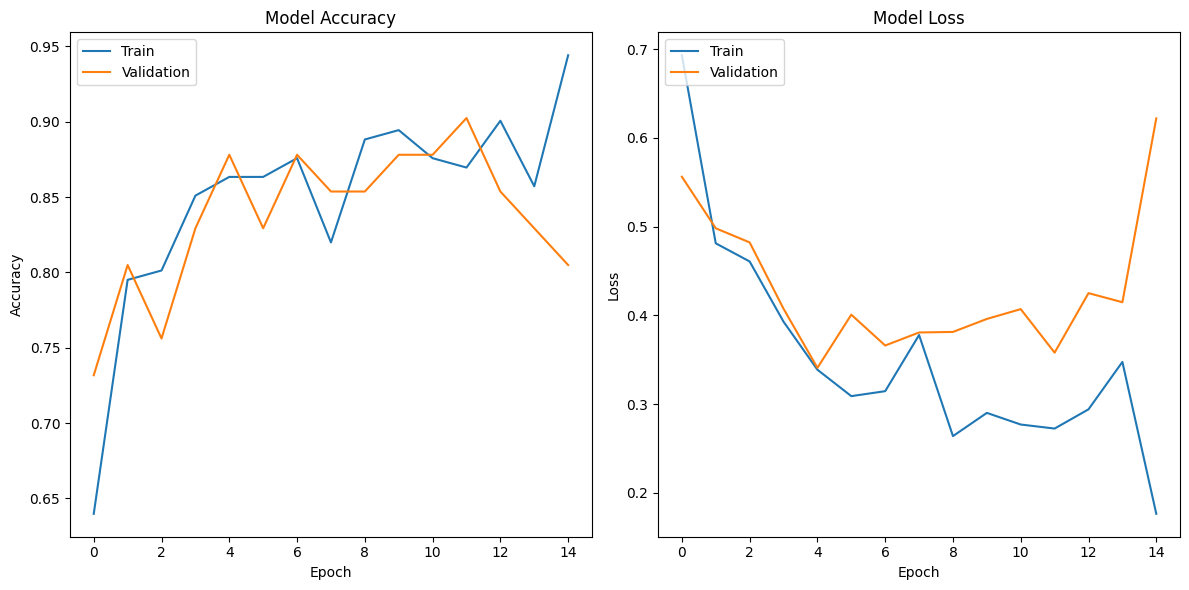

In [50]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

<Axes: >

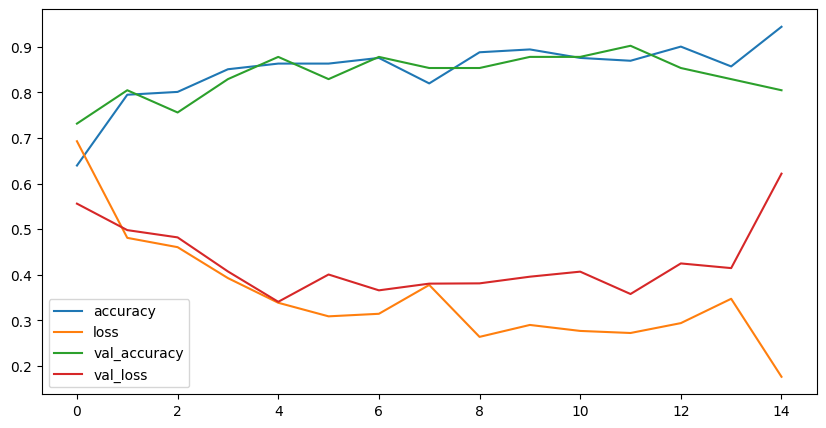

In [51]:
loss_acc_metrics_df = pd.DataFrame(history.history)
loss_acc_metrics_df.plot(figsize=(10,5))

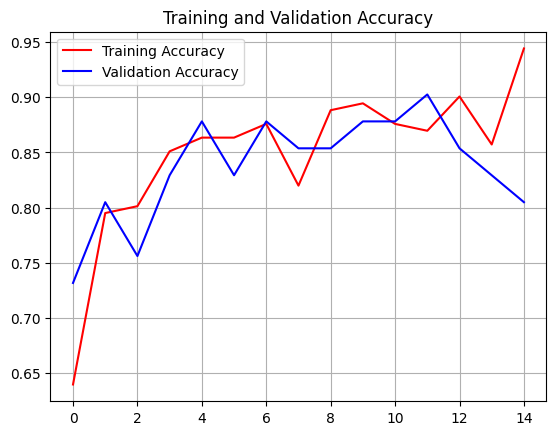

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 0)
plt.grid(True)
plt.show()

In [53]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step


Classification Report:
               precision    recall  f1-score   support

           N       0.95      0.83      0.89        24
           Y       0.87      0.96      0.91        27

    accuracy                           0.90        51
   macro avg       0.91      0.90      0.90        51
weighted avg       0.91      0.90      0.90        51



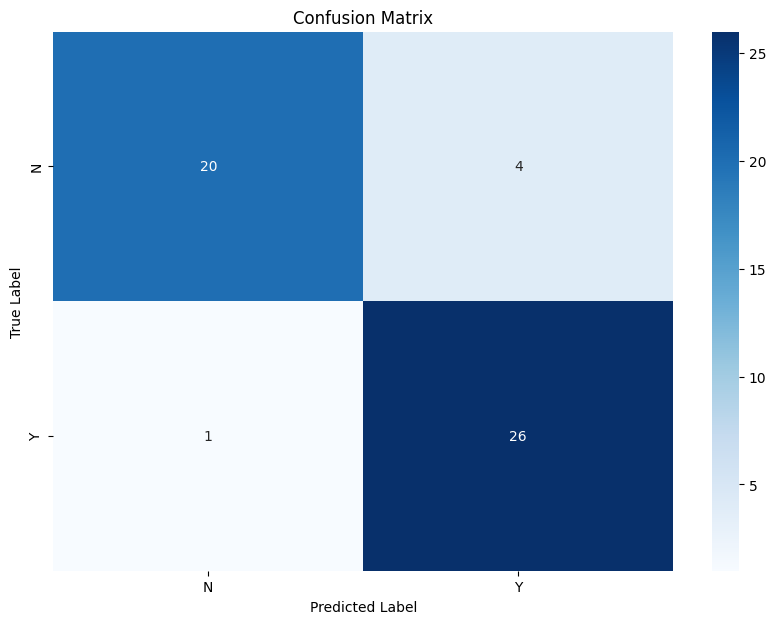

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Calculate the classification report
report = classification_report(y_true, y_pred_classes, target_names=le.classes_)

# Print classification report
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
